# Clustering Crypto

In [74]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [75]:
# Initial imports
import requests
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from pathlib import Path

### Fetching Cryptocurrency Data

In [76]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [77]:
# Use the following endpoint to fetch json data
url = "https://min-api.cryptocompare.com/data/all/coinlist"

In [78]:
# Create a DataFrame 
# HINT: You will need to use the 'Data' key from the json response, then transpose the DataFrame.

In [79]:
# Alternatively, use the provided csv file:
# file_path = Path("Resources/crypto_data.csv")

# Create a DataFrame
file_path = Path("Resources/crypto_data.csv")
crypto_df = pd.read_csv(file_path)
crypto_df.head(10)

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,41.99995,42
1,365,365Coin,X11,True,PoW/PoS,nan,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1055184902.04000,532000000
3,611,SixEleven,SHA-256,True,PoW,nan,611000
4,808,808,SHA-256,True,PoW/PoS,0.00000,0
5,1337,EliteCoin,X13,True,PoW/PoS,29279424622.50270,314159265359
6,2015,2015 coin,X11,True,PoW/PoS,nan,0
7,BTC,Bitcoin,SHA-256,True,PoW,17927175.00000,21000000
8,ETH,Ethereum,Ethash,True,PoW,107684222.68650,0
9,LTC,Litecoin,Scrypt,True,PoW,63039243.30000,84000000


In [80]:
crypto_df.shape

(1252, 7)

In [81]:
crypto_df.rename(columns={"Unnamed: 0": "Coin"}, inplace=True)
crypto_df.head()

,Coin,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,41.99995,42
1,365,365Coin,X11,True,PoW/PoS,nan,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1055184902.04000,532000000
3,611,SixEleven,SHA-256,True,PoW,nan,611000
4,808,808,SHA-256,True,PoW/PoS,0.00000,0


In [82]:
crypto_df.set_index('Coin', inplace=True)

In [83]:
crypto_df.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
Coin,,,,,,
42,42 Coin,Scrypt,True,PoW/PoS,41.99995,42
365,365Coin,X11,True,PoW/PoS,nan,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1055184902.04000,532000000
611,SixEleven,SHA-256,True,PoW,nan,611000
808,808,SHA-256,True,PoW/PoS,0.00000,0


In [84]:
crypto_df.describe()

,TotalCoinsMined
count,744.00000
mean,3883103172.45657
std,38672632629.52777
min,-5917977547.96773
25%,632216.41988
50%,13404268.97069
75%,93998952.07896
max,989988713439.64905


In [85]:
crypto_df.shape

(1252, 6)

In [86]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [87]:
crypto_df['Algorithm'].value_counts().sum()

1252

In [88]:
crypto_df['Algorithm'].value_counts().sort_index()

1GB AES Pattern Search      1
536                         2
Argon2                      2
Argon2d                     1
Avesta hash                 1
BLAKE256                    2
Blake                       8
Blake2S                     4
Blake2b                     3
C11                         2
Cloverhash                  1
Counterparty                1
CryptoNight                40
CryptoNight Heavy           3
CryptoNight Heavy X         1
CryptoNight-Lite            1
CryptoNight-V7              6
CryptoNight-lite            1
Cryptonight-GPU             1
Curve25519                  2
DPoS                       19
Dagger                      4
Dagger-Hashimoto            1
ECC 256K1                   1
Equihash                   26
Equihash+Scrypt             1
Equihash1927                1
Ethash                     18
Exosis                      1
Green Protocol              1
Groestl                     5
HMQ1725                     2
HybridScryptHash256         1
IMesh     

### Data Preprocessing

In [89]:
# Keep only necessary columns:
# 'CoinName','Algorithm','IsTrading','ProofType','TotalCoinsMined','TotalCoinSupply'
col_list = ['CoinName','Algorithm','IsTrading','ProofType','TotalCoinsMined','TotalCoinSupply']
crypto_df1 = crypto_df[col_list]
crypto_df1.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
Coin,,,,,,
42,42 Coin,Scrypt,True,PoW/PoS,41.99995,42
365,365Coin,X11,True,PoW/PoS,nan,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1055184902.04000,532000000
611,SixEleven,SHA-256,True,PoW,nan,611000
808,808,SHA-256,True,PoW/PoS,0.00000,0


In [90]:
crypto_df1['IsTrading'].value_counts()

True     1144
False     108
Name: IsTrading, dtype: int64

In [91]:
# Keep only cryptocurrencies that are trading
crypto_df2 = crypto_df1[crypto_df1['IsTrading'] == True]

In [92]:
crypto_df2['IsTrading'].value_counts()

True    1144
Name: IsTrading, dtype: int64

#### I see all are working algorithm. So i am just keeping all

In [93]:
# Keep only cryptocurrencies with a working algorithm


In [94]:
# Remove the "IsTrading" column
crypto_df3 = crypto_df2.drop(columns=['IsTrading'])
crypto_df3.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
Coin,,,,,
42,42 Coin,Scrypt,PoW/PoS,41.99995,42
365,365Coin,X11,PoW/PoS,nan,2300000000
404,404Coin,Scrypt,PoW/PoS,1055184902.04000,532000000
611,SixEleven,SHA-256,PoW,nan,611000
808,808,SHA-256,PoW/PoS,0.00000,0


In [95]:
len(crypto_df3)

1144

In [96]:
crypto_df3.shape

(1144, 5)

In [97]:
# Remove rows with at least 1 null value
crypto_df4 = crypto_df3.dropna()
crypto_df4.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
Coin,,,,,
42,42 Coin,Scrypt,PoW/PoS,41.99995,42
404,404Coin,Scrypt,PoW/PoS,1055184902.04000,532000000
808,808,SHA-256,PoW/PoS,0.00000,0
1337,EliteCoin,X13,PoW/PoS,29279424622.50270,314159265359
BTC,Bitcoin,SHA-256,PoW,17927175.00000,21000000


In [98]:
len(crypto_df4)

685

In [99]:
# Remove rows with cryptocurrencies having no coins mined
crypto_df5 = crypto_df4[crypto_df4['TotalCoinsMined'] > 0]
crypto_df5.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
Coin,,,,,
42,42 Coin,Scrypt,PoW/PoS,41.99995,42
404,404Coin,Scrypt,PoW/PoS,1055184902.04000,532000000
1337,EliteCoin,X13,PoW/PoS,29279424622.50270,314159265359
BTC,Bitcoin,SHA-256,PoW,17927175.00000,21000000
ETH,Ethereum,Ethash,PoW,107684222.68650,0


In [100]:
len(crypto_df5)

532

In [101]:
# Drop rows where there are 'N/A' text values
crypto_df6 = crypto_df5[~crypto_df5['TotalCoinSupply'].str.contains('N/A')]
crypto_df6.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
Coin,,,,,
42,42 Coin,Scrypt,PoW/PoS,41.99995,42
404,404Coin,Scrypt,PoW/PoS,1055184902.04000,532000000
1337,EliteCoin,X13,PoW/PoS,29279424622.50270,314159265359
BTC,Bitcoin,SHA-256,PoW,17927175.00000,21000000
ETH,Ethereum,Ethash,PoW,107684222.68650,0


In [102]:
crypto_df6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 532 entries, 42 to XBC
Data columns (total 5 columns):
CoinName           532 non-null object
Algorithm          532 non-null object
ProofType          532 non-null object
TotalCoinsMined    532 non-null float64
TotalCoinSupply    532 non-null object
dtypes: float64(1), object(4)
memory usage: 24.9+ KB


In [103]:
crypto_df6['TotalCoinSupply'] = crypto_df6['TotalCoinSupply'].astype(float)
crypto_df6.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
Coin,,,,,
42,42 Coin,Scrypt,PoW/PoS,41.99995,42.00000
404,404Coin,Scrypt,PoW/PoS,1055184902.04000,532000000.00000
1337,EliteCoin,X13,PoW/PoS,29279424622.50270,314159265359.00000
BTC,Bitcoin,SHA-256,PoW,17927175.00000,21000000.00000
ETH,Ethereum,Ethash,PoW,107684222.68650,0.00000


In [104]:
len(crypto_df6)

532

In [105]:
crypto_df6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 532 entries, 42 to XBC
Data columns (total 5 columns):
CoinName           532 non-null object
Algorithm          532 non-null object
ProofType          532 non-null object
TotalCoinsMined    532 non-null float64
TotalCoinSupply    532 non-null float64
dtypes: float64(2), object(3)
memory usage: 24.9+ KB


In [106]:
# Store the 'CoinName'column in its own DataFrame prior to dropping it from crypto_df
coin_df = crypto_df6['CoinName'].to_frame()
coin_df.head()
#print(coin_df)

,CoinName
Coin,
42,42 Coin
404,404Coin
1337,EliteCoin
BTC,Bitcoin
ETH,Ethereum


In [107]:
len(coin_df)

532

In [108]:
# Drop the 'CoinName' column since it's not going to be used on the clustering algorithm
crypto_df7 = crypto_df6.drop(columns=['CoinName'])
crypto_df7.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
Coin,,,,
42,Scrypt,PoW/PoS,41.99995,42.00000
404,Scrypt,PoW/PoS,1055184902.04000,532000000.00000
1337,X13,PoW/PoS,29279424622.50270,314159265359.00000
BTC,SHA-256,PoW,17927175.00000,21000000.00000
ETH,Ethash,PoW,107684222.68650,0.00000


In [109]:
crypto_df7['ProofType'].value_counts()

PoW                     237
PoW/PoS                 176
PoS                      86
DPoS                      9
PoC                       3
PoS/PoW                   2
PoS/LPoS                  1
dPoW/PoW                  1
PoST                      1
Zero-Knowledge Proof      1
POBh                      1
PoW + Hive                1
Proof of Trust            1
PoW and PoS               1
TPoS                      1
PoA                       1
HPoW                      1
DPOS                      1
Pos                       1
PoW/PoS                   1
Proof of Authority        1
LPoS                      1
PoW/PoW                   1
PoW/nPoS                  1
PoS/PoW/PoT               1
Name: ProofType, dtype: int64

In [112]:
crypto_df7.info()

<class 'pandas.core.frame.DataFrame'>
Index: 532 entries, 42 to XBC
Data columns (total 4 columns):
Algorithm          532 non-null object
ProofType          532 non-null object
TotalCoinsMined    532 non-null float64
TotalCoinSupply    532 non-null float64
dtypes: float64(2), object(2)
memory usage: 20.8+ KB


In [113]:
# Create dummy variables for text features
# Encode the categorical features (One-hot encode)
crypto_enc = pd.get_dummies(crypto_df7)
crypto_enc.head()

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,Algorithm_Cloverhash,Algorithm_Counterparty,Algorithm_CryptoNight,Algorithm_CryptoNight Heavy,Algorithm_CryptoNight-V7,Algorithm_Cryptonight-GPU,Algorithm_DPoS,Algorithm_Dagger,Algorithm_Dagger-Hashimoto,Algorithm_ECC 256K1,Algorithm_Equihash,Algorithm_Equihash+Scrypt,Algorithm_Ethash,Algorithm_Exosis,Algorithm_Green Protocol,Algorithm_Groestl,Algorithm_HMQ1725,Algorithm_HybridScryptHash256,Algorithm_IMesh,Algorithm_Jump Consistent Hash,Algorithm_Keccak,Algorithm_Leased POS,Algorithm_Lyra2RE,Algorithm_Lyra2REv2,Algorithm_Lyra2Z,Algorithm_M7 POW,Algorithm_Multiple,Algorithm_NIST5,Algorithm_NeoScrypt,Algorithm_Ouroboros,Algorithm_PHI1612,Algorithm_POS 2.0,Algorithm_POS 3.0,Algorithm_PoS,Algorithm_Proof-of-Authority,Algorithm_Proof-of-BibleHash,Algorithm_QUAIT,Algorithm_QuBit,Algorithm_Quark,Algorithm_SHA-256,Algorithm_SHA-256 + Hive,Algorithm_SHA-256D,Algorithm_SHA-512,Algorithm_SHA3,Algorithm_Scrypt,Algorithm_Semux BFT consensus,Algorithm_Shabal256,Algorithm_Skein,Algorithm_SkunkHash,Algorithm_SkunkHash v2 Raptor,Algorithm_Stanford Folding,Algorithm_TRC10,Algorithm_Time Travel,Algorithm_Tribus,Algorithm_VBFT,Algorithm_VeChainThor Authority,Algorithm_X11,Algorithm_X11GOST,Algorithm_X13,Algorithm_X14,Algorithm_X15,Algorithm_X16R,Algorithm_XEVAN,ProofType_DPOS,ProofType_DPoS,ProofType_HPoW,ProofType_LPoS,ProofType_POBh,ProofType_PoA,ProofType_PoC,ProofType_PoS,ProofType_PoS/LPoS,ProofType_PoS/PoW,ProofType_PoS/PoW/PoT,ProofType_PoST,ProofType_PoW,ProofType_PoW + Hive,ProofType_PoW and PoS,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
Coin,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
42,41.99995,42.00000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
404,1055184902.04000,532000000.00000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1337,29279424622.50270,314159265359.00000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
BTC,17927175.00000,21000000.00000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
ETH,107684222.68650,0.00000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [114]:
crypto_enc.shape

(532, 98)

In [115]:
crypto_enc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 532 entries, 42 to XBC
Data columns (total 98 columns):
TotalCoinsMined                     532 non-null float64
TotalCoinSupply                     532 non-null float64
Algorithm_1GB AES Pattern Search    532 non-null uint8
Algorithm_536                       532 non-null uint8
Algorithm_Argon2d                   532 non-null uint8
Algorithm_BLAKE256                  532 non-null uint8
Algorithm_Blake                     532 non-null uint8
Algorithm_Blake2S                   532 non-null uint8
Algorithm_Blake2b                   532 non-null uint8
Algorithm_C11                       532 non-null uint8
Algorithm_Cloverhash                532 non-null uint8
Algorithm_Counterparty              532 non-null uint8
Algorithm_CryptoNight               532 non-null uint8
Algorithm_CryptoNight Heavy         532 non-null uint8
Algorithm_CryptoNight-V7            532 non-null uint8
Algorithm_Cryptonight-GPU           532 non-null uint8
Algorithm_DPoS 

In [116]:
# Standardize data
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(crypto_enc)
crypto_enc_scaled = scaler.transform(crypto_enc)

In [117]:
crypto_enc_scaled

array([[-0.11710817, -0.1528703 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.09396955, -0.145009  , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [ 0.52494561,  4.48942416, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       ...,
       [-0.09561336, -0.13217937, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11694817, -0.15255998, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11710536, -0.15285552, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ]])

### Reducing Dimensions Using PCA

In [118]:
# Use PCA to reduce dimensions to 3 principal components

# Initialize PCA model
pca = PCA(n_components=3)

# Get two principal components for the iris data.
crypto_pca = pca.fit_transform(crypto_enc_scaled)

In [119]:
crypto_pca

array([[-0.32741472,  1.0171186 , -0.46981938],
       [-0.31077097,  1.01706994, -0.47002036],
       [ 2.30891876,  1.51778333, -0.49441837],
       ...,
       [ 0.32214098, -2.28270024,  0.31189696],
       [-0.14130858, -1.91743996,  0.39730259],
       [-0.2823732 ,  0.8023966 , -0.22830835]])

In [120]:
# Create a DataFrame with the principal components data
# Transform PCA data to a DataFrame
df_crypto_pca = pd.DataFrame(
    data=crypto_pca, columns=["principal component 1", "principal component 2", "principal component 3"]
)
df_crypto_pca.head()

,principal component 1,principal component 2,principal component 3
0,-0.32741,1.01712,-0.46982
1,-0.31077,1.01707,-0.47002
2,2.30892,1.51778,-0.49442
3,-0.14867,-1.30537,0.17963
4,-0.15050,-1.98967,0.25873


In [121]:
df_crypto_pca.set_index(keys=coin_df.index, inplace=True)

In [122]:
df_crypto_pca.head()

,principal component 1,principal component 2,principal component 3
Coin,,,
42,-0.32741,1.01712,-0.46982
404,-0.31077,1.01707,-0.47002
1337,2.30892,1.51778,-0.49442
BTC,-0.14867,-1.30537,0.17963
ETH,-0.15050,-1.98967,0.25873


In [123]:
df_crypto_pca.shape

(532, 3)

In [124]:
# Fetch the explained variance
pca.explained_variance_ratio_

array([0.02792996, 0.02138767, 0.02047156])

In [125]:
sum(pca.explained_variance_ratio_)

0.0697891903280696

### Clustering Crytocurrencies Using K-Means

#### Find the Best Value for `k` Using the Elbow Curve

In [126]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_crypto_pca)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot

#elbow_data = {"k": k, "inertia": inertia}
#df_elbow = pd.DataFrame(elbow_data)
#df_elbow.hvplot.line(x="k", y="inertia", xticks=k, title="Elbow Curve")

In [127]:
k

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [128]:
inertia

[3638.529226944236,
 2476.087039330604,
 1509.4872779556802,
 573.2898641093072,
 384.0351865214371,
 282.50658963883507,
 220.6593175840135,
 165.89318589924085,
 140.34676178375108,
 114.181745041806]

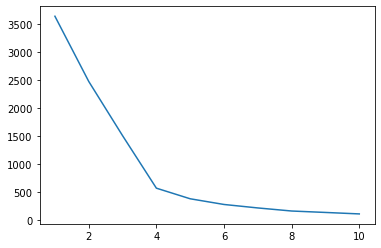

In [129]:
plt.plot(k, inertia)

Running K-Means with `k=<your best value for k here>`  K = 4 seems to be the best value.

In [130]:
# Initialize the K-Means model
model = KMeans(n_clusters=4, random_state=0)
# Fit the model
model.fit(df_crypto_pca)
# Predict clusters
predictions = model.predict(df_crypto_pca)
# Create a new DataFrame including predicted clusters and cryptocurrencies features
df_crypto_pca_k = df_crypto_pca.copy(deep=True)
df_crypto_pca_k["class"] = model.labels_
df_crypto_pca_k.head()



#concat_df = pd.DataFrame(crypto_df7[["Algorithm", "ProofType", "TotalCoinsMined", "TotalCoinSupply"]])
#clustered_df=pd.concat([concat_df.reset_index(drop=True), df_crypto_pca_k[['PC 1', 'PC 2', 'PC 3']].reset_index()], axis=1)

,principal component 1,principal component 2,principal component 3,class
Coin,,,,
42,-0.32741,1.01712,-0.46982,0
404,-0.31077,1.01707,-0.47002,0
1337,2.30892,1.51778,-0.49442,0
BTC,-0.14867,-1.30537,0.17963,1
ETH,-0.15050,-1.98967,0.25873,1


In [131]:
crypto_df6.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
Coin,,,,,
42,42 Coin,Scrypt,PoW/PoS,41.99995,42.00000
404,404Coin,Scrypt,PoW/PoS,1055184902.04000,532000000.00000
1337,EliteCoin,X13,PoW/PoS,29279424622.50270,314159265359.00000
BTC,Bitcoin,SHA-256,PoW,17927175.00000,21000000.00000
ETH,Ethereum,Ethash,PoW,107684222.68650,0.00000


In [132]:
concat_df = pd.concat([crypto_df6,df_crypto_pca_k], axis =1 )

In [133]:
df_crypto_pca_k.shape

(532, 4)

In [134]:
concat_df.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,principal component 1,principal component 2,principal component 3,class
Coin,,,,,,,,,
42,42 Coin,Scrypt,PoW/PoS,41.99995,42.00000,-0.32741,1.01712,-0.46982,0
404,404Coin,Scrypt,PoW/PoS,1055184902.04000,532000000.00000,-0.31077,1.01707,-0.47002,0
1337,EliteCoin,X13,PoW/PoS,29279424622.50270,314159265359.00000,2.30892,1.51778,-0.49442,0
BTC,Bitcoin,SHA-256,PoW,17927175.00000,21000000.00000,-0.14867,-1.30537,0.17963,1
ETH,Ethereum,Ethash,PoW,107684222.68650,0.00000,-0.15050,-1.98967,0.25873,1


In [135]:
concat_df['class'].value_counts()

0    289
1    238
3      4
2      1
Name: class, dtype: int64

In [136]:
concat_df.shape

(532, 9)

In [137]:
concat_df['class'].value_counts()

0    289
1    238
3      4
2      1
Name: class, dtype: int64

### Visualizing Results

#### 3D-Scatter with Clusters

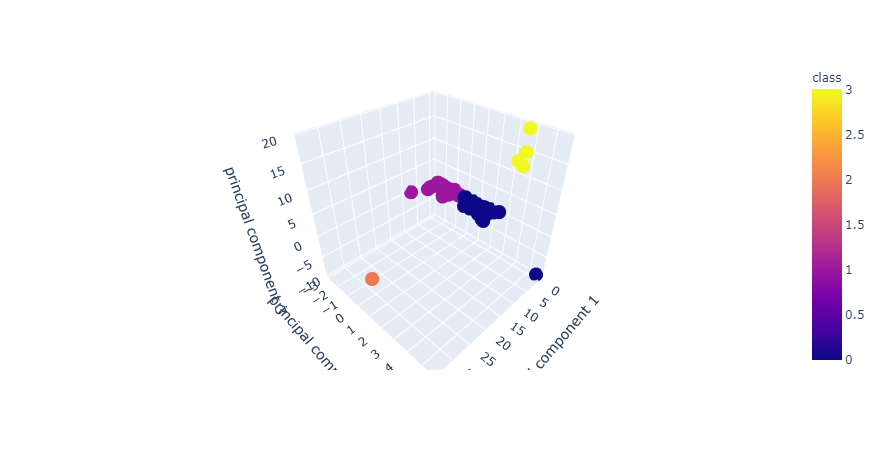

In [138]:
# Create a 3D-Scatter with the PCA data and the clusters
# Plotting the clusters
# df_crypto_pca_k.hvplot.scatter(
#     x="principal component 1",
#     y="principal component 2",
#     z="principal component 3",
#     hover_cols=["class"], --- CoinName.
#     by="class",
# )

#df_crypto_pca_k = px.data.iris()
fig = px.scatter_3d(concat_df, x='principal component 1', y='principal component 2', z='principal component 3',
              color='class', hover_name="CoinName", hover_data=["Algorithm"],)
fig.show()


## Image stored as "3d plot.png" on the main github page

#### Table of Tradable Cryptocurrencies

In [139]:
# Table with tradable cryptos
#coin_df.head()
concat_df.hvplot.table(columns=['Coin','CoinName'], sortable=True, selectable=True)

:Table   [Coin,CoinName]

In [140]:
# Print the total number of tradable cryptocurrencies
print('Total number of tradeable cryptocurrencies: ', len(coin_df))
#coin_df

Total number of tradeable cryptocurrencies:  532


#### Scatter Plot with Tradable Cryptocurrencies

In [141]:
crypto_df6.head()
crypto_trd_df = crypto_df6.drop(columns=['CoinName', 'Algorithm', 'ProofType'])
crypto_trd_df.head()

,TotalCoinsMined,TotalCoinSupply
Coin,,
42,41.99995,42.00000
404,1055184902.04000,532000000.00000
1337,29279424622.50270,314159265359.00000
BTC,17927175.00000,21000000.00000
ETH,107684222.68650,0.00000


In [142]:
# Scale data to create the scatter plot
crypto_trd = StandardScaler().fit_transform(crypto_trd_df)
crypto_trd

array([[-0.11710817, -0.1528703 ],
       [-0.09396955, -0.145009  ],
       [ 0.52494561,  4.48942416],
       ...,
       [-0.09561336, -0.13217937],
       [-0.11694817, -0.15255998],
       [-0.11710536, -0.15285552]])

In [143]:
df_crypto_trd = pd.DataFrame(
    data=crypto_trd, columns=["TotalCoinsMined", "TotalCoinSupply"])
df_crypto_trd.head()

,TotalCoinsMined,TotalCoinSupply
0,-0.11711,-0.15287
1,-0.09397,-0.14501
2,0.52495,4.48942
3,-0.11672,-0.15256
4,-0.11475,-0.15287


In [144]:
df_crypto_trd.set_index(keys=coin_df.index, inplace=True)

In [145]:
df_crypto_trd.head()

,TotalCoinsMined,TotalCoinSupply
Coin,,
42,-0.11711,-0.15287
404,-0.09397,-0.14501
1337,0.52495,4.48942
BTC,-0.11672,-0.15256
ETH,-0.11475,-0.15287


In [146]:
# Plot the scatter with x="TotalCoinsMined" and y="TotalCoinSupply"
df_crypto_trd.hvplot.scatter(
    x="TotalCoinsMined",
    y="TotalCoinSupply",
#    z="principal component 3",
#    hover_cols=["Coin"]
#    by="Coin"
)

:Scatter   [TotalCoinsMined]   (TotalCoinSupply)

In [147]:
crypto_df6.head()
crypto_trd_df2 = crypto_df6.drop(columns=['CoinName', 'Algorithm', 'ProofType'])
crypto_trd_df2.head()

,TotalCoinsMined,TotalCoinSupply
Coin,,
42,41.99995,42.00000
404,1055184902.04000,532000000.00000
1337,29279424622.50270,314159265359.00000
BTC,17927175.00000,21000000.00000
ETH,107684222.68650,0.00000


#### Plot w/o scaling

In [148]:
crypto_trd_df2.hvplot.scatter(
    x="TotalCoinsMined",
    y="TotalCoinSupply"
#    z="principal component 3",
#    hover_cols=["class"],
#    by="class",
)

:Scatter   [TotalCoinsMined]   (TotalCoinSupply)